## Lending_Club_CaseStudy_





General Information

- Problem Statement : Business Understanding - Lending Club Case Study We are working for a consumer finance company which specializes in lending various types of loans to urban customers. When we receive a loan application, we have to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with our decision: •If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company •If the applicant is not likely to repay the loan, i.e., he/she is likely to default, then approving the loan may lead to a financial loss for the company.


- Business Objective The objective is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment. We need to research about risk analytics by understanding the types of variables and their significance should be enough.


- Analysis Approach: The following will the approach that will be followed to analyze the data and then provide a solution: 1.Understand the data properly 2.Clean and manipulate data as needed 3.Data analysis 4.Provide result of analysis in form of visualization.



- Analysis Approach:

The following will the approach that will be followed to analyze the data and then provide a solution:
    
    1. Understand the data properly

    2. Clean and manipulate data as needed

    3. Data analysis
    
    4. Provide result of analysis in form of visualization


Dataset Used Loans.csv - It had all the data related to loans and customers

Submitted by -  Utkarsh Chaturvedi

In [1]:
## import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

loan_info = pd.read_csv(r'C:\Users\HP\Desktop\Lending club cae study\loan.csv')
loan_info                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# shape of the dataset
loan_info.shape

(39717, 111)

In [6]:
# We have considered all the the Customer and Loan realted fields. We have also removed the the fields that that are created 
# after a loan application has been approved as we are trying to see which loan applications are risky. 

columns_required = ['loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'installment',
'grade',
'sub_grade',
'emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'issue_d',
'loan_status',
'url',
'desc',
'purpose',
'title',
'zip_code',	
'addr_state',	
'dti',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'dti',
'term'
];

column = [x for x in loan_info.columns if x not in columns_required]

for col in column:
    loan_info = loan_info.drop(col, axis=1)
loan_info.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94


In [7]:
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  url                  39717 non-null 

In [9]:
# check the null values in the data set

loan_info.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                   12529
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
dtype: int64

As from the above information it is clear that there are null values in multiple fields.

In [8]:
# dropping rows with loan status "Current" because it does not  give any usful information 
loan_info = loan_info[~(loan_info['loan_status'] == 'Current')]
loan_info.shape

(38577, 22)

# Data Cleaning 

In [10]:
#Filtering the rows where emp_length is blank
loan_info.dropna(subset = ["emp_length"], inplace=True)

# Extract number from emp-length and update in dataset
loan_info = loan_info.assign(emp_length = lambda x: x['emp_length'].str.extract('(\d+)'))

#Take out % from int_rate
loan_info['int_rate'] = loan_info['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# Extract number from term and update in dataset
loan_info = loan_info.assign(term = lambda x: x['term'].str.extract('(\d+)'))

# Extract xx from zip_code and update in dataset
loan_info['zip_code'] = loan_info['zip_code'].apply(lambda x: pd.to_numeric(x.split("x")[0]))

# Make Verification Status column as Verified and Source Verified into one value as Verified and all other values as Not Verified.
loan_info['verification_status']= loan_info['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_info['int_rate_cats'] = pd.cut(loan_info['int_rate'],[0, 10, 12.5, 16, 20, 27], labels=['0-10', '10-12.5', '12.5-20', '20-25','26-30'])


# categorise dti  into buckets which will help in analysis further in bivariate analysis.
loan_info['dti_cats'] = pd.cut(loan_info['dti'],[0, 10, 12.5, 16, 20, 30], labels=['0-10', '10-12.5', '12.5-20', '20-25','26-30'])


loan_info

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802,CO,11.33,0-10,10-12.5
39713,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274,NC,6.40,10-12.5,0-10
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,17,MA,2.30,0-10,0-10
39715,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208,MD,3.72,0-10,0-10


Before  Removal of Outliers :
count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


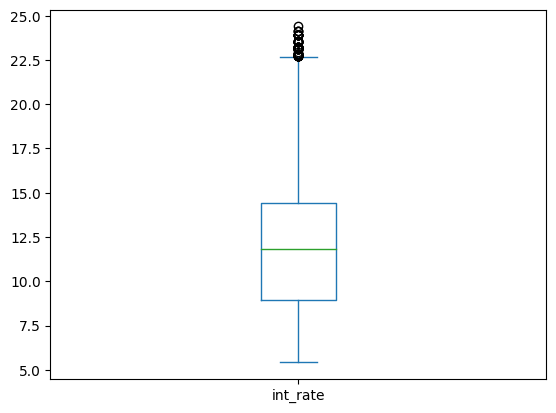

In [11]:
#Univariant Analysis
# Boxplot is showing outliar values which we need to analyze while during analysis
loan_info['int_rate'].plot.box()

print('Before  Removal of Outliers :')
print(loan_info["int_rate"].describe())

After  Removal of Outliers :
count    37164.000000
mean        11.861822
std          3.560823
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         20.900000
Name: int_rate, dtype: float64


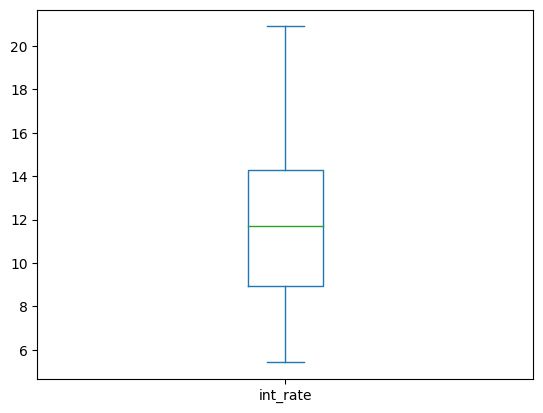

In [12]:
loan_info = loan_info[loan_info["int_rate"] < loan_info["int_rate"].quantile(0.99)]
loan_info['int_rate'].plot.box()

print('After  Removal of Outliers :')
print(loan_info["int_rate"].describe())

Before  Removal of Outliers :
count    3.716400e+04
mean     6.912548e+04
std      6.455407e+04
min      4.000000e+03
25%      4.100000e+04
50%      5.970000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


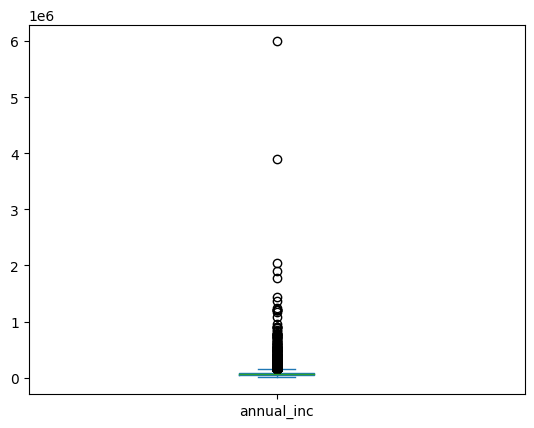

In [13]:
# Boxplot is showing outliar values in annual income which we need to analyze while during further analysis
loan_info['annual_inc'].plot.box()
print('Before  Removal of Outliers :')
print(loan_info["annual_inc"].describe())

After Removal of Outliers :
count     35522.000000
mean      61740.942560
std       28273.514868
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78448.015000
max      149981.000000
Name: annual_inc, dtype: float64


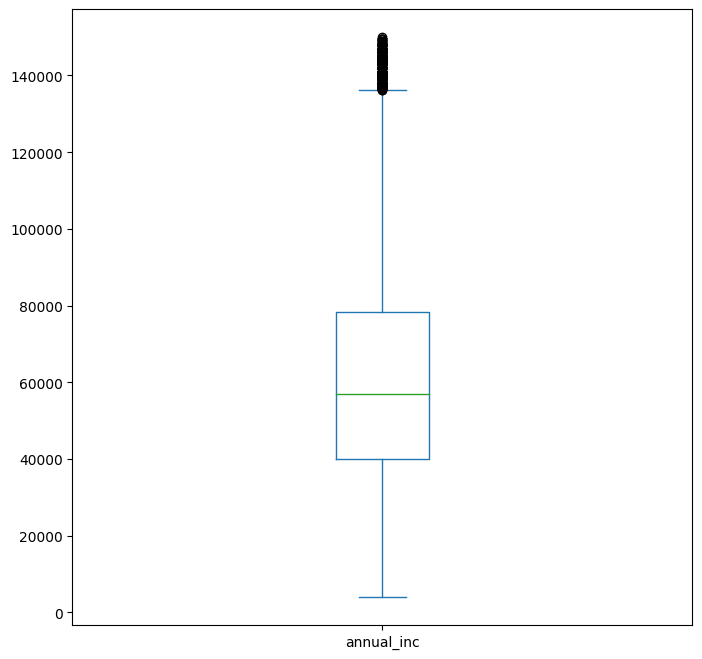

In [19]:
# Remove Outliers quantile .99 from annual_inc

loan_info = loan_info[loan_info["annual_inc"] < loan_info["annual_inc"].quantile(0.99)]
loan_info['annual_inc'].plot.box(figsize= (8,8))

print('After Removal of Outliers :')
print(loan_info["annual_inc"].describe())

In [16]:
# Derived columns
# We are going to create derived cloumns for month and year columns separately that we are going to use for analysis

loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

loan_info.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats,year,month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5,2011,12
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,12.5-20,26-30,2011,12
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,20-25,0-10,2011,12
9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,1,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,12.5-20,20-25,2011,12
10,6500,6500,6500.0,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,12.5-20,20-25,2011,12
11,12000,12000,12000.0,36,12.69,402.54,B,B5,UCLA,10,...,NaN,debt_consolidation,Consolidation,913,CA,10.78,12.5-20,10-12.5,2011,12


In [20]:
# Derived columns
# We are going to create derived cloumns for month and year columns separately that we are going to use for analysis

loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

loan_info.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats,year,month
0,5000,5000,4975.00000,36,10.65,162.87,B,B2,NaN,10,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30,2011,12
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,1,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10,2011,12
2,2400,2400,2400.00000,36,15.96,84.33,C,C5,NaN,10,...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10,2011,12
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25,2011,12
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5,2011,12
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,12.5-20,26-30,2011,12
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,20-25,0-10,2011,12
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,1,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,12.5-20,20-25,2011,12
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,12.5-20,20-25,2011,12
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,...,NaN,debt_consolidation,Consolidation,913,CA,10.78,12.5-20,10-12.5,2011,12


# Univariate Analysis



### Univariate Analysis on Loan Amount




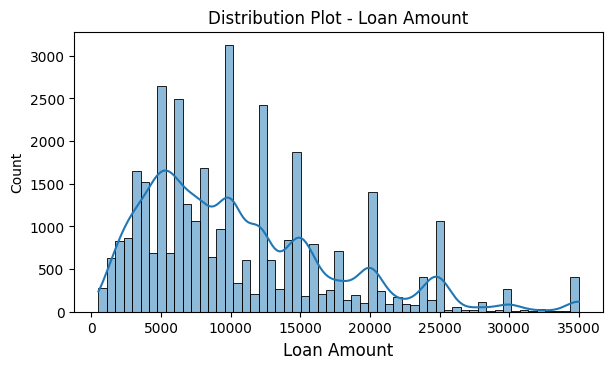

In [24]:
#Create a Distribution Plot of the Loan Amount 

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ds = sns.histplot(loan_info['loan_amnt'],kde = True)
ds.set_title('Distribution Plot - Loan Amount')
ds.set_xlabel('Loan Amount',fontsize=12,color='black')
plt.show()

From the distribution plot above we can dedcue that most of the loans that are being taken are between 5000 - 10000

### Univariant Analysis on Annual Income

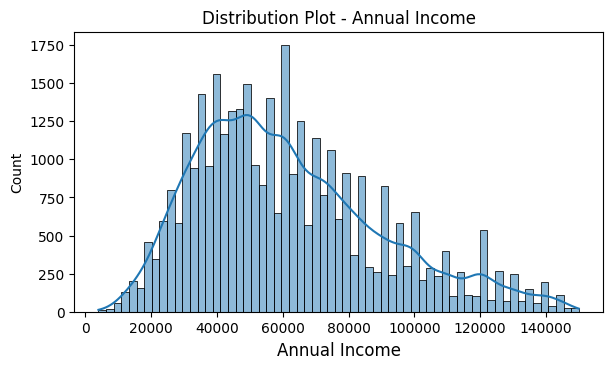

In [23]:

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 2)
ds = sns.histplot(loan_info['annual_inc'], kde=True)
ds.set_title('Distribution Plot - Annual Income')
ds.set_xlabel('Annual Income', fontsize=12, color='black')
plt.show()

### Univariate Analysis on Derived metrics  - Loan Issue Year

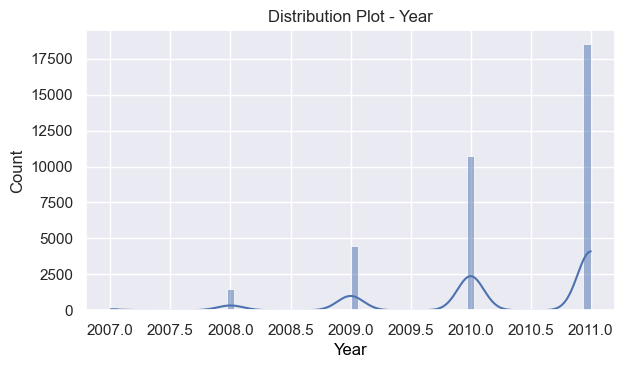

In [25]:
#Create a Distribution Plot of the Laon Issue year 

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.histplot(loan_info['year'],kde = True)
ds.set_title('Distribution Plot - Year')
ds.set_xlabel('Year',fontsize=12,color='black')
plt.show()

 From the distribution plot above we can deduce that Numbers of loans distributed are increasing by each year
 
 2011 had the most number of loans

###  Univariate Analysis on Interest Rate

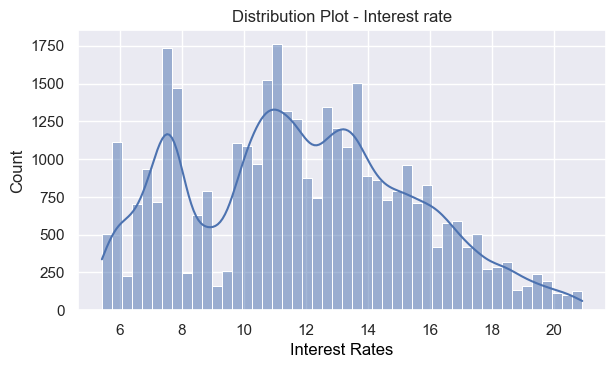

In [27]:
#Create a Distribution Plot of the Interest Rate 

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.histplot(loan_info['int_rate'],kde = True)
ds.set_title('Distribution Plot - Interest rate')
ds.set_xlabel('Interest Rates',fontsize=12,color='black')
plt.show()

 From the distribution plot above we can deduce interest rates are mostly between 10% - 15% 

In [28]:
# We will derive new variables for our analysis

#  creating derived cloumns for month and year columns separately that we are going to use for analysis

loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

loan_info.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats,year,month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5,2011,12
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,12.5-20,26-30,2011,12
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,20-25,0-10,2011,12
9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,1,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,12.5-20,20-25,2011,12
10,6500,6500,6500.0,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,12.5-20,20-25,2011,12
11,12000,12000,12000.0,36,12.69,402.54,B,B5,UCLA,10,...,NaN,debt_consolidation,Consolidation,913,CA,10.78,12.5-20,10-12.5,2011,12


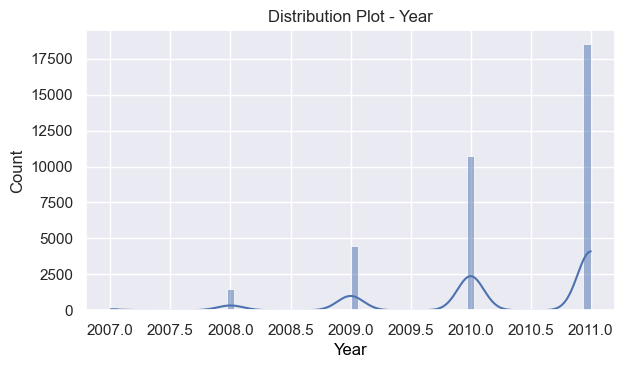

In [30]:
# Analysis on Derived column Year

#Create a Distribution Plot of the Year

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.histplot(loan_info['year'],kde = True)
ds.set_title('Distribution Plot - Year')
ds.set_xlabel('Year',fontsize=12,color='black')
plt.show()

# BIVARIATE ANALYSIS 

### Bivariate Analysis on verification status against Chargedoff

<Axes: xlabel='verification_status', ylabel='count'>

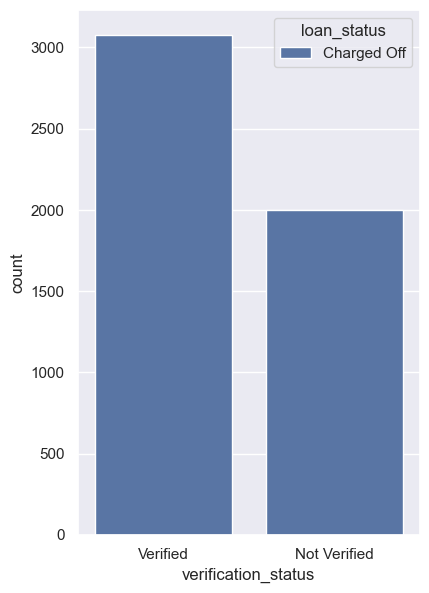

In [34]:
# For Bivariant Analysis we will focus on the loan status of "Charged Off" so that we can anlyze which variables have more impact on 
loan_info = loan_info[(loan_info['loan_status'] == 'Charged Off')]

plt.figure(figsize=(15, 15)) 
plt.subplot(231)
sns.countplot(x="verification_status", hue=loan_info['loan_status'], data=loan_info)

From the distribution plot above we can state that customers that were verified have very more chnaces of charge off

### Bivariate Analysis on grade against Chargedoff

<Axes: xlabel='grade', ylabel='count'>

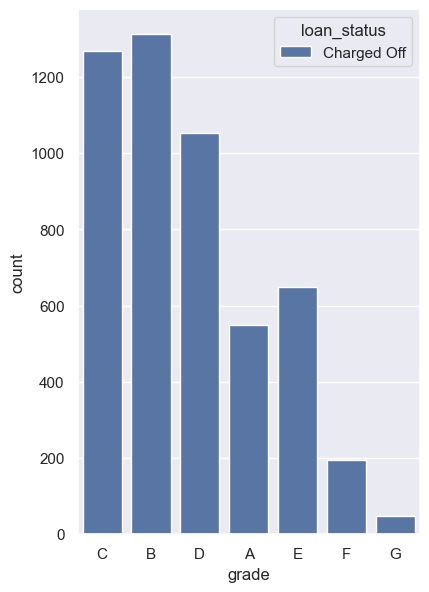

In [33]:
plt.figure(figsize=(15, 15))  
plt.subplot(231)
sns.countplot(x="grade", hue=loan_info['loan_status'], data=loan_info)

 From the distribution plot above we can deduce state customers with grade G have very less chnaces of charge off

### Bivariate Analysis on sub grade against Chargedoff

<Axes: xlabel='sub_grade', ylabel='count'>

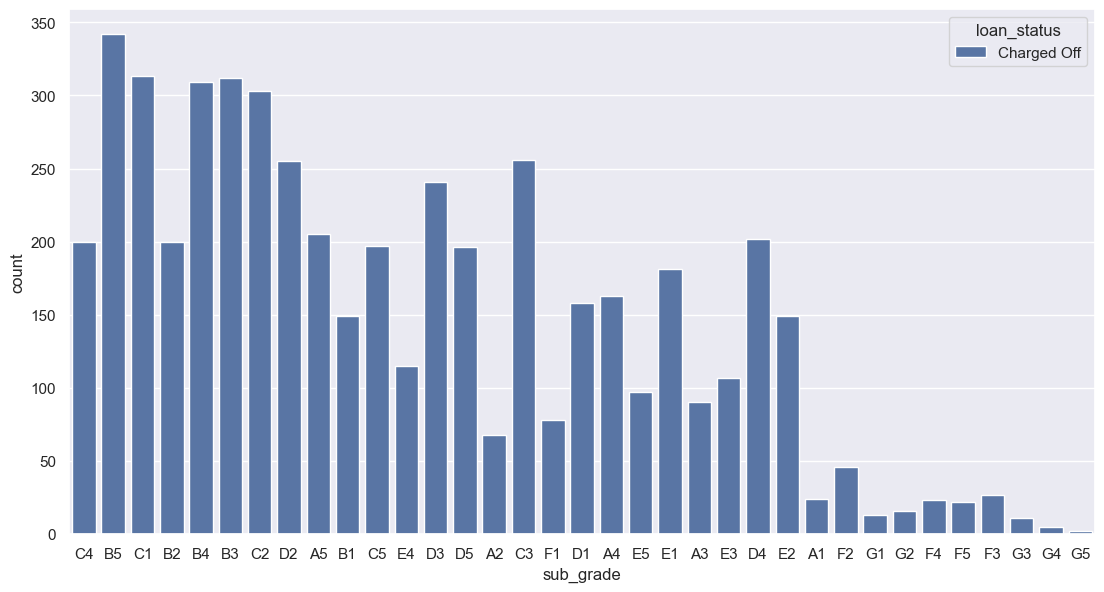

In [39]:
plt.figure(figsize=(45, 15))  
plt.subplot(231)
sns.countplot(x="sub_grade", hue=loan_info['loan_status'], data=loan_info)

From the distribution plot above we can state that customers with sub grade B3, B4 and B5  have very largest chances of charge off

### Bivariate Analysis on interest rates against Chargedoff

<Axes: xlabel='int_rate_cats', ylabel='count'>

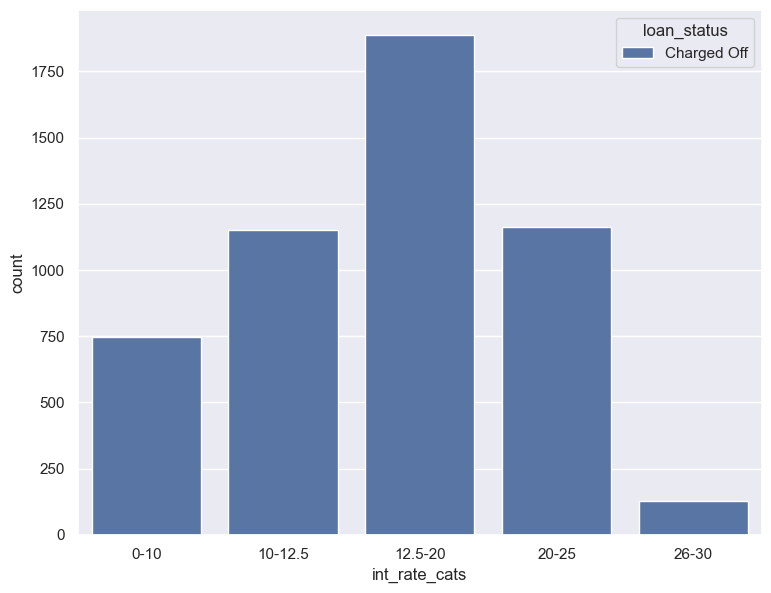

In [40]:
plt.figure(figsize=(30, 15))  
plt.subplot(231)
sns.countplot(x="int_rate_cats", hue=loan_info['loan_status'], data=loan_info)

- From the distribution plot below we can deduce that customers with interest rates between 20-25 %  have very less chances of  charge off
- customers with interest rates between 12.5-16%  have very high chances of charge off

### Bivariate Analysis on dti against Chargedoff

<Axes: xlabel='dti_cats', ylabel='count'>

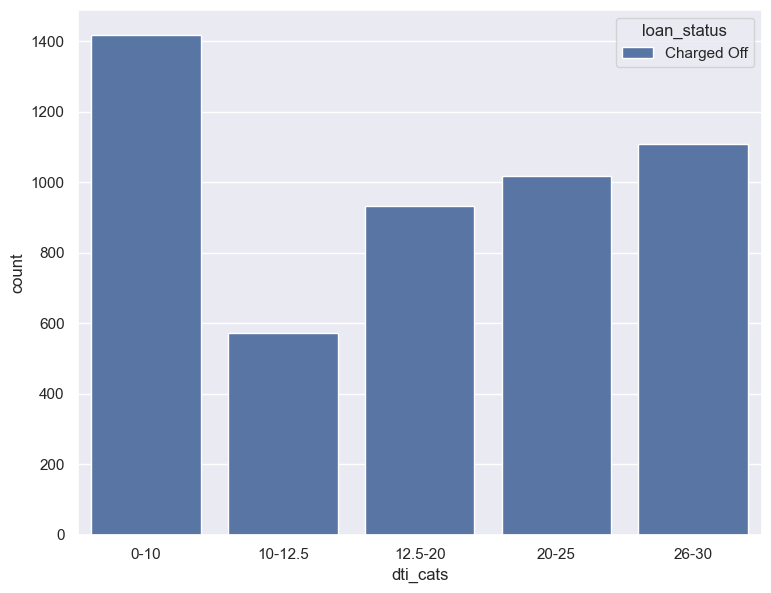

In [41]:
plt.figure(figsize=(30, 15))  
plt.subplot(231)
sns.countplot(x="dti_cats", hue=loan_info['loan_status'], data=loan_info)

From the distribution plot above we can state that customers with dti between 0-10 %  have very high chances of charged off

### Bivariate Analysis on home ownership against Chargedoff

<Axes: xlabel='home_ownership', ylabel='count'>

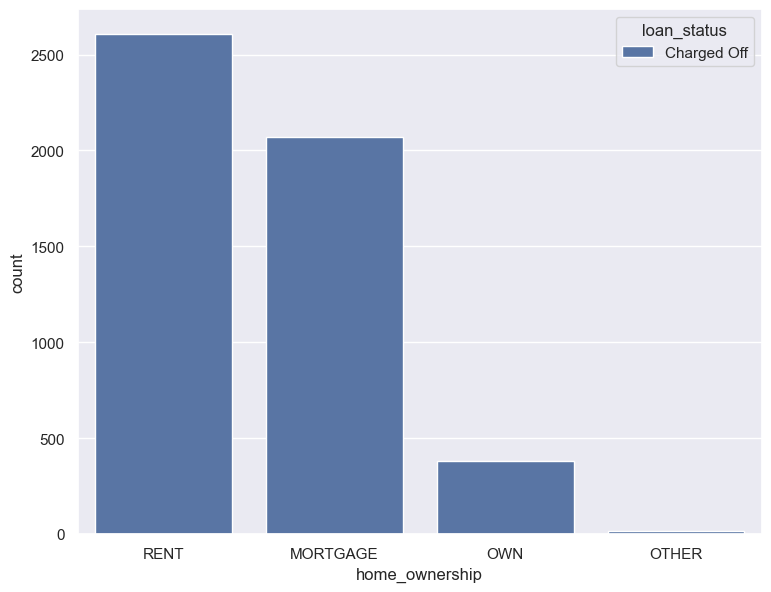

In [42]:
plt.figure(figsize=(30, 15))  
plt.subplot(231)
sns.countplot(x="home_ownership", hue=loan_info['loan_status'], data=loan_info)

From the distribution plot above we can state that customers who are on rent have very more chances of charge off

### Bivariate Analysis on state(address) against Chargedoff

<Axes: xlabel='addr_state', ylabel='count'>

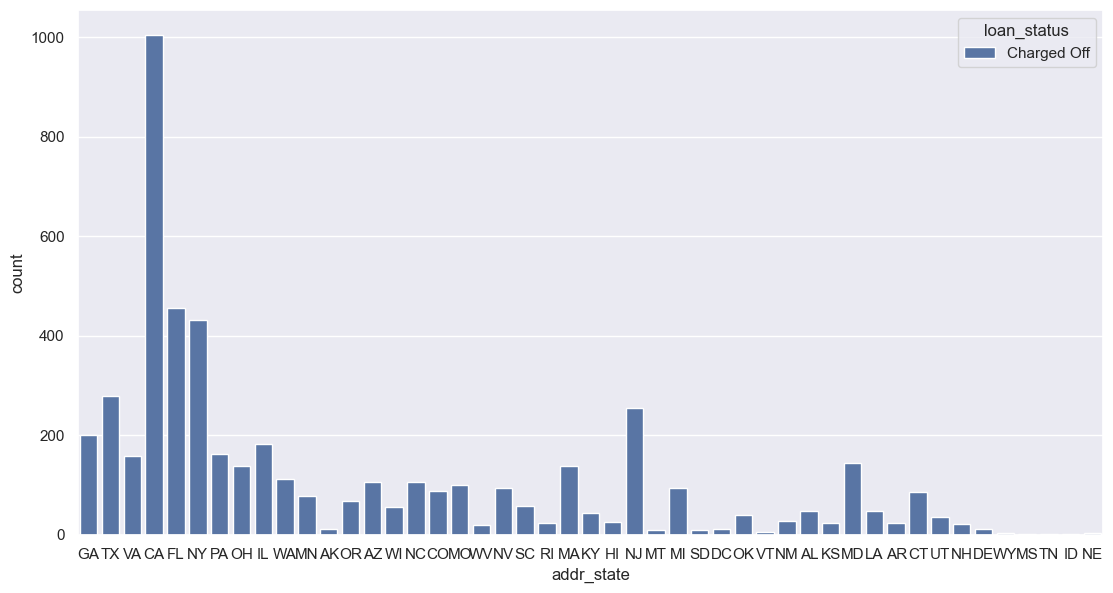

In [44]:
plt.figure(figsize=(45, 15))  
plt.subplot(231)
sns.countplot(x="addr_state", hue=loan_info['loan_status'], data=loan_info)

From the distribution plot above we can state that customers from California(CA) have very more chances of charge off

In [45]:
# We are going to see how  all variables are corelated to each other
loans_correlation = loan_info.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate','term','installment','annual_inc','dti']) 
cor = loans_correlation.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,term,installment,annual_inc,dti
loan_amnt,1.000,0.979,0.899,0.301,0.376,0.921,0.438,0.075
funded_amnt,0.979,1.000,0.918,0.304,0.358,0.950,0.434,0.070
funded_amnt_inv,0.899,0.918,1.000,0.321,0.412,0.843,0.388,0.085
int_rate,0.301,0.304,0.321,1.000,0.428,0.276,0.122,0.052
term,0.376,0.358,0.412,0.428,1.000,0.106,0.111,0.076
installment,0.921,0.950,0.843,0.276,0.106,1.000,0.436,0.048
annual_inc,0.438,0.434,0.388,0.122,0.111,0.436,1.000,-0.032
dti,0.075,0.070,0.085,0.052,0.076,0.048,-0.032,1.000


# Multivariate Analysis

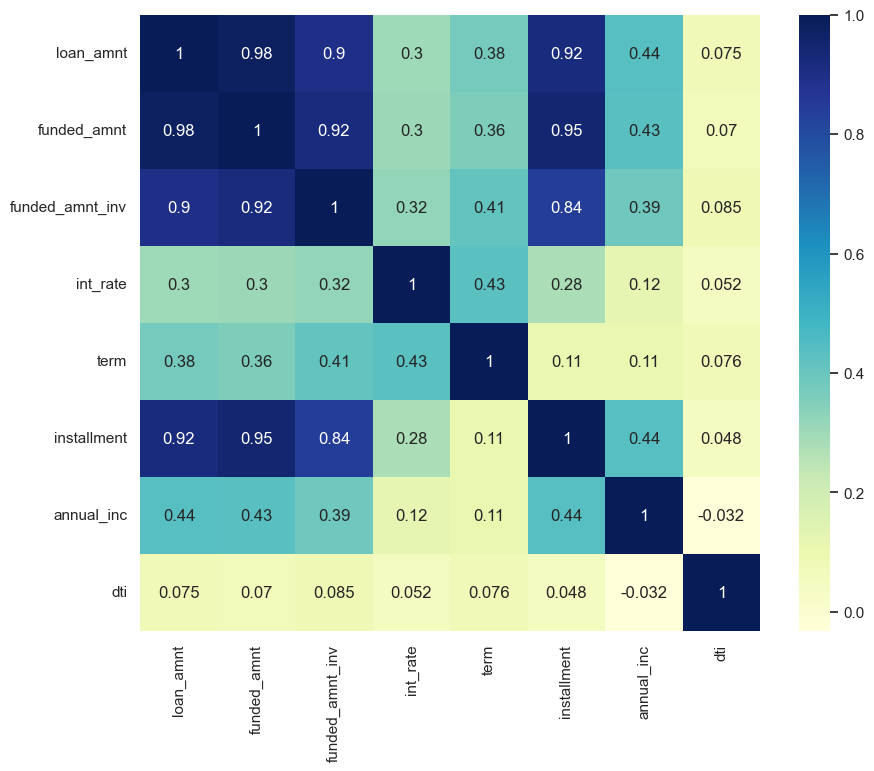

In [47]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Analysis Result


### Insight

The first exercise is to analyze all the data that has been provided and only consider the data that is relevant. The objective is to find the applicants which have strong probability of defaulting and also to identify the applicants which can repay their loan.


The objective is that we want to know which loan applications are risky. So, the fields that that are created after a loan application is approved will not be part of our analysis. Also, I have considered some customer related fields that are relevant and will provide us with intelligence related to demographics.

Based upon that I have identified that the following data is relevant for our analysis:


        ◦ loan_amnt
        ◦ funded_amnt
        ◦ funded_amnt_inv
        ◦ term
        ◦ int_rate
        ◦ installment
        ◦ grade
        ◦ sub_grade
        ◦ emp_title
        ◦ emp_length
        ◦ home_ownership
        ◦ annual_inc
        ◦ verification_status
        ◦ issue_d
        ◦ loan_status
        ◦ url
        ◦ desc
        ◦ purpose
        ◦ title
        ◦ zip_code
        ◦ addr_state
        ◦ dti
        ◦ addr_state
        ◦ purpose
        ◦ loan_amnt
        ◦ funded_amnt
        ◦ funded_amnt_inv
        ◦ dti
        ◦ term

### Data Cleaning

- Removed blank entries
- Manipulated emp_length, int_rate, term and zip code fields
- Created bins to be further used during bivariate analysis.

### Univariate Analysis: conclusion

1. Outlier analysis was done using box plot on int_rate and annual_inc.
2. Univariate Analysis on Loan Amount, Annual Income, Loan Issue Year (Derived metrics), Interest Rate, Loan Status, year(derived).
3. Most loans that are being taken are between $5000 - $10000.
4. Annual income of customers that are taking loan is around $50000 range.
5. Numbers of loans distributed are increasing by each year. Year 2011 had the greatest number of loans disbursed.
6. Interest rates are mostly between 10% - 15%.

### Bivariate Analysis: conclusion


For Bivariant Analysis we will focus on the loan status of "Charged Off" so that we can analyze which variables have more impact. Based upon this analysis bank can make intelligent decision during loan approvals.

Bivariant analysis was done on the following variables:

    1. Loan Status (Charged off) with Grade
    2. Loan Status (Charged off) with Verification Status
    3. Loan Status (Charged off) with Sub Grade
    4. Loan Status (Charged off) with Interest rate categories
    5. Loan Status (Charged off) with dti categories
    6. Loan Status (Charged off) with home ownership categories
    7. Loan Status (Charged off) with state categories

Based upon the bivariarte  count plots the following are the conclusions based upon Bivariant analysis:

- Customers that were verified have more chances of loan being charged off
- Customers with sub grade 'B3', 'B4' and 'B5' have very more chances of loan being charged off
- Customers with Grade 'G' have less chances of loan being charged off
- Customers with interest rates between 12.5% - 16% have high chances of loan being charged off
- Customers with dti between less than 10% have high chances of loan being charged off
- Customers who have rented accommodation have more chances of loan being charged off
- Customers that are living in California have high chances of loan being charged off

# Multivariate Analysis: conclusion 


Multivariant analysis has been done using heatmap.

Based upon the above heat map the following are the conclusions based upon Multivariant analysis:

- Loan amounts have high correlation with Funded amount, Funded amount committed by investor and installment.
- Funded amounts have high correlation with Loan amount, Funded amount committed by investor and installment.
- Funded amount committed by investor have high correlation with Loan amount, Funded amount and installment.